# Project2

Generic Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats

%matplotlib inline
style = sns.color_palette("ch:2.5,-.2,dark=.3")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Part 1 Exploratory Data Analysis

What kind of analysis we will perform

1. Missing Values
2. Cleaning Data
3. Data Inspection
4. Finding relationship between features
5. Will generate new features 

Loading both files

In [2]:
df = pd.read_csv('googleplaystore.csv', encoding='latin_1')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']

<Axes: >

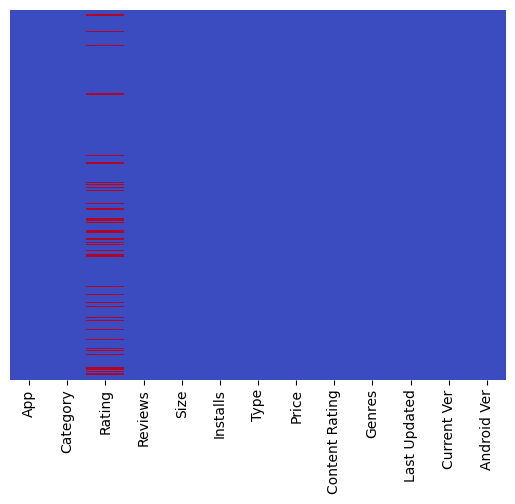

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Getting Categorical and numerical columns separately

In [8]:
def cat_num(df):
    
    categorical_columns = df.select_dtypes(include=['object']).columns
    numerical_columns = df.select_dtypes(exclude=['object']).columns
    
    categorical_columns = df.select_dtypes(include=['object']).columns
    print("Categorical Columns:")
    print(categorical_columns)
    print("\nMissing Values are : ")
    print(df[categorical_columns].isnull().sum())
    
    Numerical_columns = df.select_dtypes(exclude=['object']).columns
    print("\nNumerical Columns:")
    print(Numerical_columns)
    print("\nMissing Values are : ")
    print(df[Numerical_columns].isnull().sum())
    

In [9]:
cat_num(df)

Categorical Columns:
Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Missing Values are : 
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

Numerical Columns:
Index(['Rating'], dtype='object')

Missing Values are : 
Rating    1474
dtype: int64


In [10]:
#droping null values 

In [11]:
df = df.dropna(subset=['Type',  'Current Ver', 'Android Ver'])

In [12]:
df.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [13]:
#checking Rating column separately

In [14]:
df.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [15]:
#75% of values are in between 4 & 5 so we can impute Rating easily by mean 

In [16]:
x = sum(df.Rating.describe()[4:8])/4
df.Rating = df.Rating.fillna(x)
print("Dataset contains ",df.isna().any().sum()," Nan values.")

Dataset contains  0  Nan values.


In [17]:
#Now checking for rating as it should not upto 5

In [18]:
df = df[df['Rating']<=5]

In [19]:
#Checking for duplicates and droping to get distinct data

In [20]:
df.duplicated().sum()

483

In [21]:
df = df.drop_duplicates()

In [22]:
#df.tail(50)

# Transforming Data 

In [23]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# converting category column using one hot encoding method

In [24]:
df_new = df.copy()
df_new.Category = pd.Categorical(df_new.Category)

x = df_new[['Category']]
del df_new['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
df_new = pd.concat([df_new,dummies], axis=1)

In [25]:
label_encoder = LabelEncoder()
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [26]:
df_new.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0


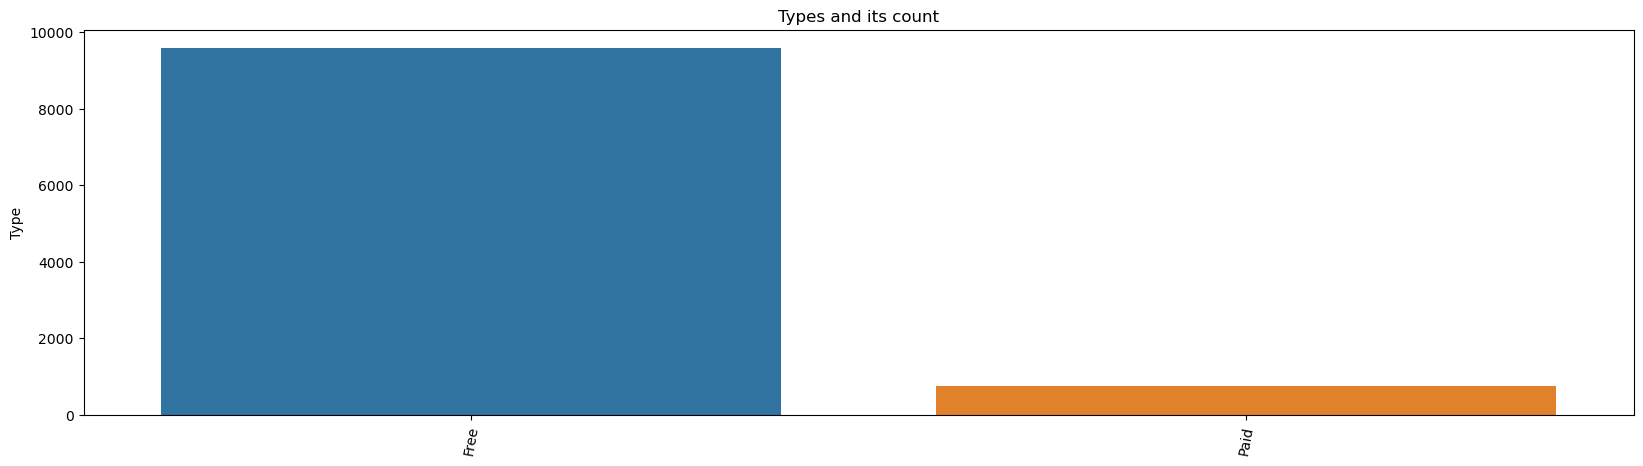

In [27]:
plt.figure(figsize=(20,5))
sns.barplot(x=df_new.Type.value_counts().index,y=df_new.Type.value_counts())
plt.xticks(rotation=80)
plt.title('Types and its count')
plt.show()

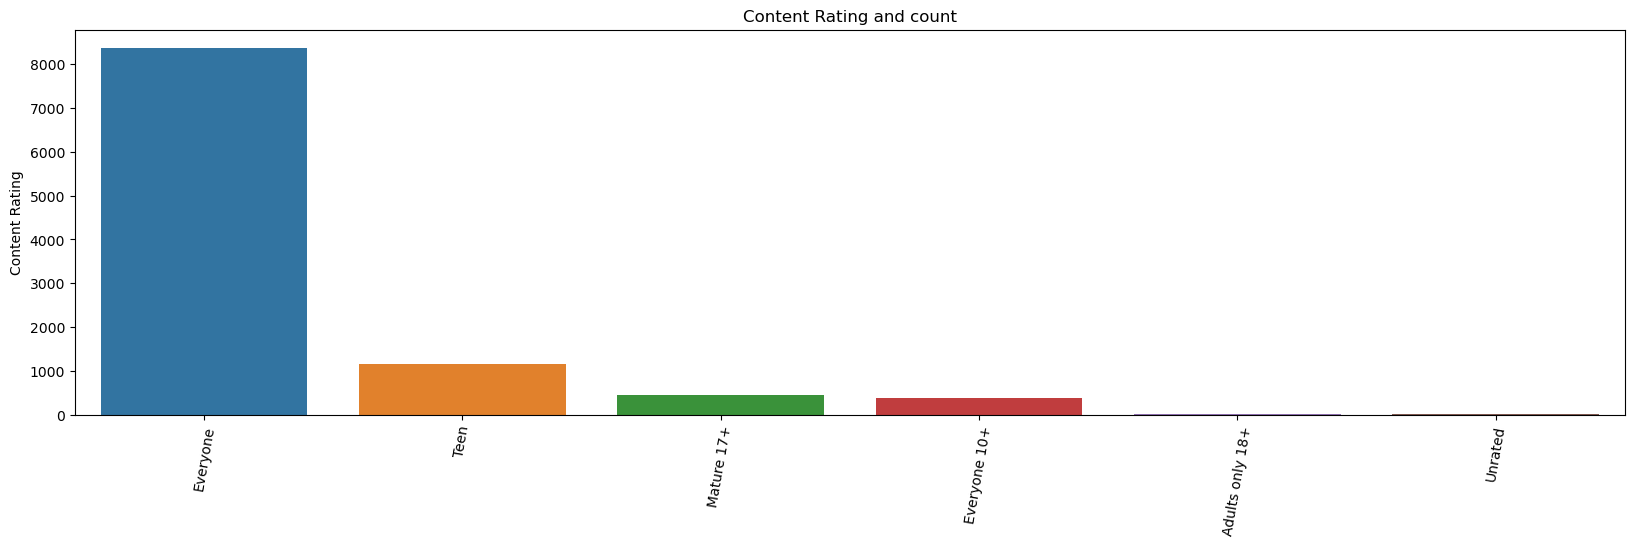

In [28]:
plt.figure(figsize=(20,5))
sns.barplot(x=df_new['Content Rating'].value_counts().index, y=df_new['Content Rating'].value_counts())
plt.xticks(rotation=80)
plt.title('Content Rating and count')
plt.show()

In [29]:
#convert string values to ordinal 

In [30]:
df = df_new.copy()
df['Content Rating'] = df['Content Rating'].map({'Unrated':0.0,
                                                 'Everyone':1.0,
                                                 'Everyone 10+':2.0,
                                                 'Teen':3.0,
                                                 'Adults only 18+':4.0,
                                                 'Mature 17+':5.0})
df['Content Rating'] = df['Content Rating'].astype(float)
df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,1.0,Art & Design,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,1.0,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",4.7,87510,8.7M,"5,000,000+",Free,0,1.0,Art & Design,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,3.0,Art & Design,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,1.0,Art & Design;Creativity,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0


In [31]:
df['Content Rating'].unique()

array([1., 3., 2., 5., 4., 0.])

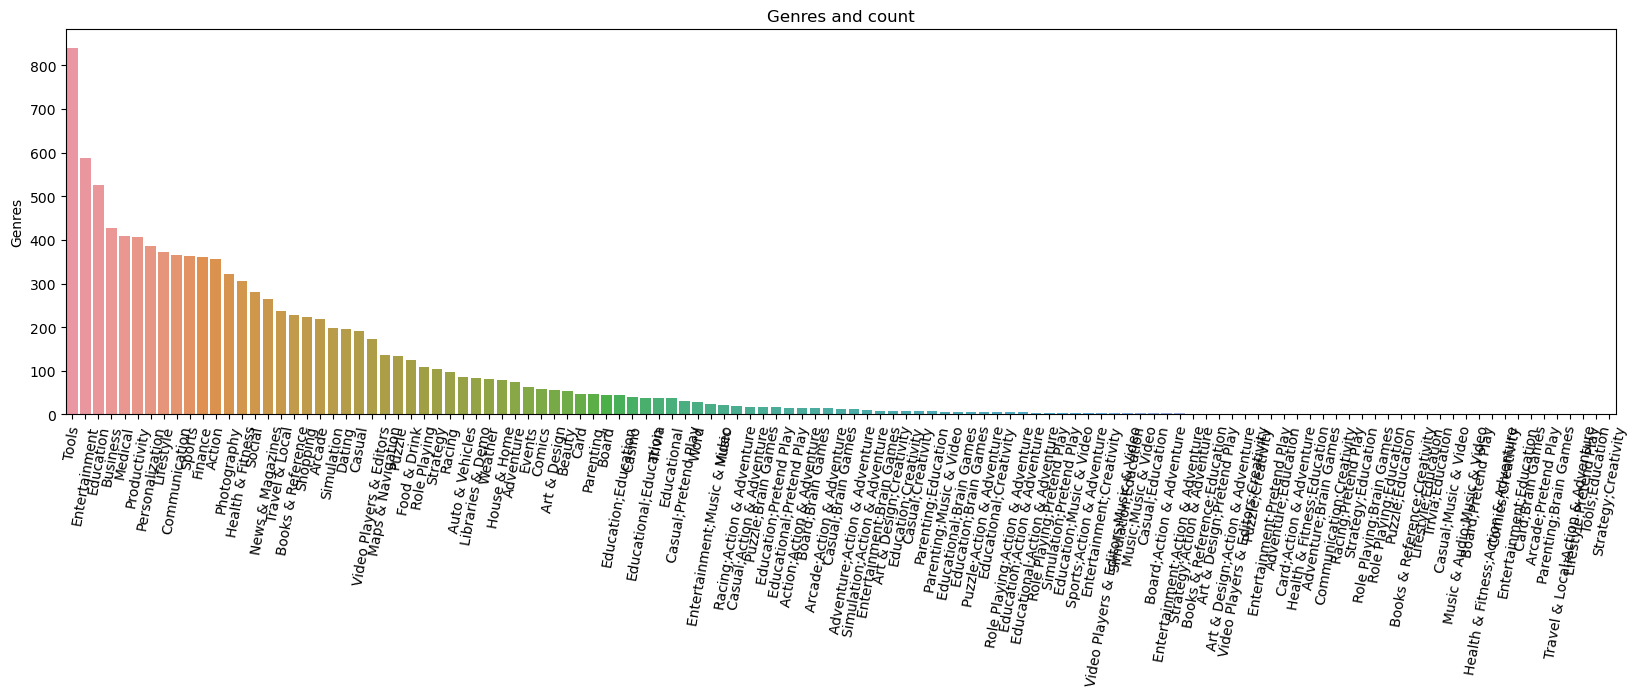

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(x=df_new['Genres'].value_counts().index, y=df_new['Genres'].value_counts())
plt.xticks(rotation=80)
plt.title('Genres and count')
plt.show()

In [33]:
#converting Reviews str type to float for getting overall operations

In [34]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [35]:
df['Reviews'] = df['Reviews'].astype(float)

In [36]:
df['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [37]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [38]:
#Converting it to float type and imputing by median in place of 'M', 'K', 'Varies with device'

In [39]:
lists = []
for i in df['Size']:
    if 'M' in i:
        i = float(i.replace('M',''))
        i = i*1000000
        lists.append(i)
    elif 'k' in i:
        i = float(i.replace('k',''))
        i = i*1000
        lists.append(i)
    else:
        lists.append("Unknown")
    
k = pd.Series(lists)
median = k[k!="Unknown"].median()
k = [median if i=="Unknown" else i for i in k]
df['Size'] = k

del k,median,lists

In [40]:
#tackling Price column removing dollar sign

In [41]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [42]:
df['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in df['Price']]

In [43]:
#df['Price'].unique()

In [44]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [45]:
#removing + sign and commas from install and convert it to float type

In [46]:
df['Installs'] = [ float(i.replace('+','').replace(',', '')) if '+' in i or ',' in i else float(0) for i in df['Installs'] ]

In [47]:
df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [48]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [49]:
df.Type = df.Type.map({'Free':0,"Paid":1})


In [50]:
df['Type'].unique()

array([0, 1], dtype=int64)

In [51]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [52]:
from datetime import datetime
df2 = df.copy()
df2["Last Updated"] = [datetime.strptime(i, '%B %d, %Y') for i in df2["Last Updated"]]

In [53]:
df2 = df2.set_index("Last Updated")
df3 = df2.sort_index()
df3.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
Last Updated,,,,,,,,,,,,,,,,,,,,,
2010-05-21,FML F*ck my life + widget,4.2,1415.0,209000.0,100000.0,0,0.0,1.0,Entertainment,3.1,...,0,0,0,0,0,0,0,0,0,0
2011-01-30,CJ Poker Odds Calculator,4.1,207.0,116000.0,50000.0,0,0.0,1.0,Card,1.2,...,0,0,0,0,0,0,0,0,0,0
2011-03-16,FD Shift Calendar Widget,4.1,981.0,73000.0,100000.0,0,0.0,1.0,Tools,1.2.4,...,0,0,0,0,0,0,1,0,0,0
2011-04-11,DEER HUNTER CHALLENGE,3.7,38767.0,4100000.0,5000000.0,0,0.0,2.0,Action,1.4.3,...,0,0,0,0,0,0,0,0,0,0
2011-04-16,Freecell CY,4.0,387.0,1100000.0,50000.0,0,0.0,1.0,Card,1.3.3,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#we have transformed each column now lets look is there any null values present

In [55]:
df3.isna().any().sum()

0

In [56]:
#yaayyy we are done our first dataset

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10346 entries, 2010-05-21 to 2018-08-08
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   App                           10346 non-null  object 
 1   Rating                        10346 non-null  float64
 2   Reviews                       10346 non-null  float64
 3   Size                          10346 non-null  float64
 4   Installs                      10346 non-null  float64
 5   Type                          10346 non-null  int64  
 6   Price                         10346 non-null  float64
 7   Content Rating                10346 non-null  float64
 8   Genres                        10346 non-null  object 
 9   Current Ver                   10346 non-null  object 
 10  Android Ver                   10346 non-null  object 
 11  Category_ART_AND_DESIGN       10346 non-null  uint8  
 12  Category_AUTO_AND_VEHICLES    10346 non-nul

# Outliers

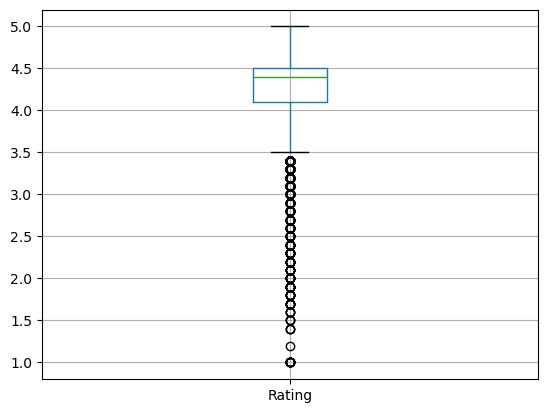

In [58]:
# Plot a box and whisker plot for the rating column
df3.boxplot(column='Rating')

# Show the plot
plt.show()

# Loading user reviews dataset



In [93]:
df_2 = pd.read_csv('googleplaystore_user_reviews.csv')
df_2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [94]:
df_2.shape

(64295, 5)

In [95]:
df_2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [96]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [97]:
df_2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [98]:
df_2.duplicated().sum()

33616

<Axes: >

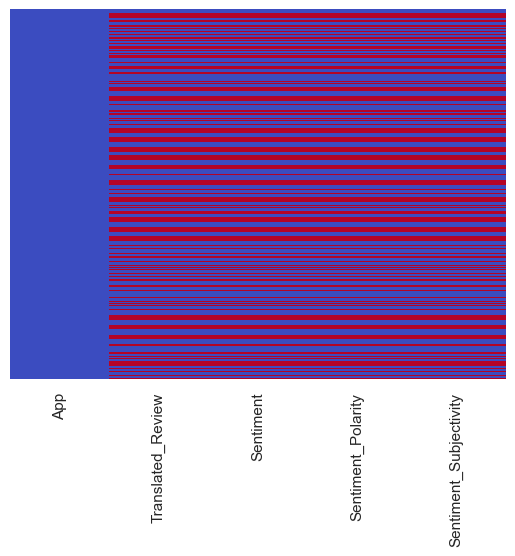

In [99]:
sns.heatmap(df_2.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [100]:
#dropping duplicates that have the same app name and translated review

In [101]:
df_2 = df_2.drop_duplicates(subset=["App", "Translated_Review"]) 

In [102]:
#removing na values

In [103]:
df_2 = df_2.dropna(subset=['Translated_Review',  'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

In [104]:
df_m = pd.merge(df3, df_2, on='App')

In [105]:
df_m.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,...,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Apk Installer,3.8,7750.0,292000.0,1000000.0,0,0.0,1.0,Libraries & Demo,1.0,...,0,0,0,0,0,0,This great! Don't listen comments people sayin...,Positive,0.287500,0.437500
1,Apk Installer,3.8,7750.0,292000.0,1000000.0,0,0.0,1.0,Libraries & Demo,1.0,...,0,0,0,0,0,0,"Super unuseful. Oh, god. It makes sense! It ex...",Positive,0.208333,0.511905
2,Apk Installer,3.8,7750.0,292000.0,1000000.0,0,0.0,1.0,Libraries & Demo,1.0,...,0,0,0,0,0,0,"A joke I installed write review, need instal ....",Positive,0.300000,0.678571
3,Apk Installer,3.8,7750.0,292000.0,1000000.0,0,0.0,1.0,Libraries & Demo,1.0,...,0,0,0,0,0,0,Um To saying need it.. us nexus 7 users going ...,Positive,1.000000,1.000000
4,Apk Installer,3.8,7750.0,292000.0,1000000.0,0,0.0,1.0,Libraries & Demo,1.0,...,0,0,0,0,0,0,"Simple efficient! This bones, straight forward...",Positive,0.050000,0.367857


In [106]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38308 entries, 0 to 38307
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   App                           38308 non-null  object 
 1   Rating                        38308 non-null  float64
 2   Reviews                       38308 non-null  float64
 3   Size                          38308 non-null  float64
 4   Installs                      38308 non-null  float64
 5   Type                          38308 non-null  int64  
 6   Price                         38308 non-null  float64
 7   Content Rating                38308 non-null  float64
 8   Genres                        38308 non-null  object 
 9   Current Ver                   38308 non-null  object 
 10  Android Ver                   38308 non-null  object 
 11  Category_ART_AND_DESIGN       38308 non-null  uint8  
 12  Category_AUTO_AND_VEHICLES    38308 non-null  uint8  
 13  C

In [107]:
df_m.isna().any().sum()

0

In [108]:
#as both datasets are merged and clean now we can perform further analysis

# Exploratory Data Analysis

In [109]:
df_m.Genres.value_counts()

Action                       3158
Sports                       2192
Health & Fitness             1848
Casual                       1707
Tools                        1619
                             ... 
Sports;Action & Adventure      34
Role Playing;Pretend Play      33
Casual;Action & Adventure      22
Simulation;Pretend Play        14
Board;Brain Games               1
Name: Genres, Length: 65, dtype: int64

In [110]:
# pie chart to show top 5 Genres

In [111]:
Genres_names = df_m.Genres.value_counts().index

In [112]:
Genres_val = df_m.Genres.value_counts().values

([<matplotlib.patches.Wedge at 0x218871df750>,
 [Text(0.6463512592491092, 0.8900730586120955, 'Action'),
  Text(-0.9067433140700291, 0.6227491970201975, 'Sports'),
  Text(-0.9052535774930036, -0.6249127622605564, 'Health & Fitness'),
  Text(0.10393757575422943, -1.0950785270227583, 'Casual'),
  Text(0.9740133687743686, -0.5111731188636645, 'Tools')],
 [Text(0.3525552323176959, 0.4854943956065975, '30.01%'),
  Text(-0.4945872622200158, 0.33968138019283495, '20.83%'),
  Text(-0.4937746786325473, -0.3408615066875762, '17.56%'),
  Text(0.05669322313867059, -0.5973155601942317, '16.22%'),
  Text(0.5312800193314737, -0.27882170119836236, '15.38%')])

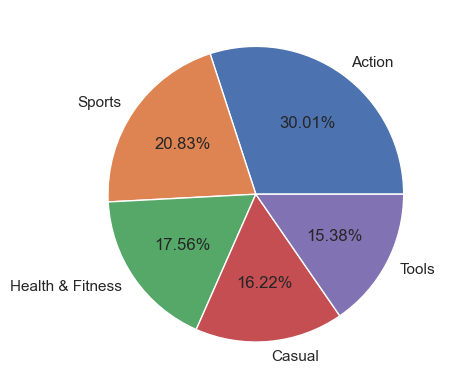

In [113]:
plt.pie(Genres_val[:5],labels=Genres_names[:5],autopct='%1.2f%%')

Action and Sports are top most Genres

In [114]:
df3['Type'].unique()

array([0, 1], dtype=int64)

C:\Users\OSAID'$ laptop'$\AppData\Local\Temp\ipykernel_15176\1890229347.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Rating'],color='g');


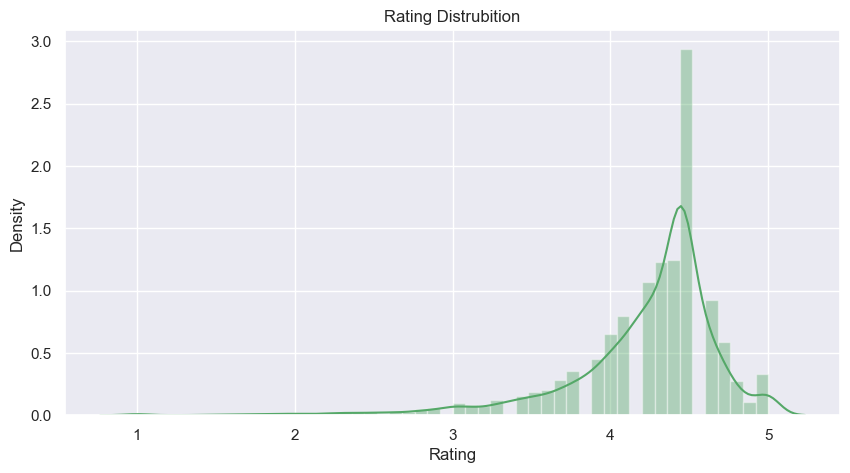

In [115]:
plt.figure(figsize=(10,5))
sns.distplot(df3['Rating'],color='g');
plt.title("Rating Distrubition")
plt.show()

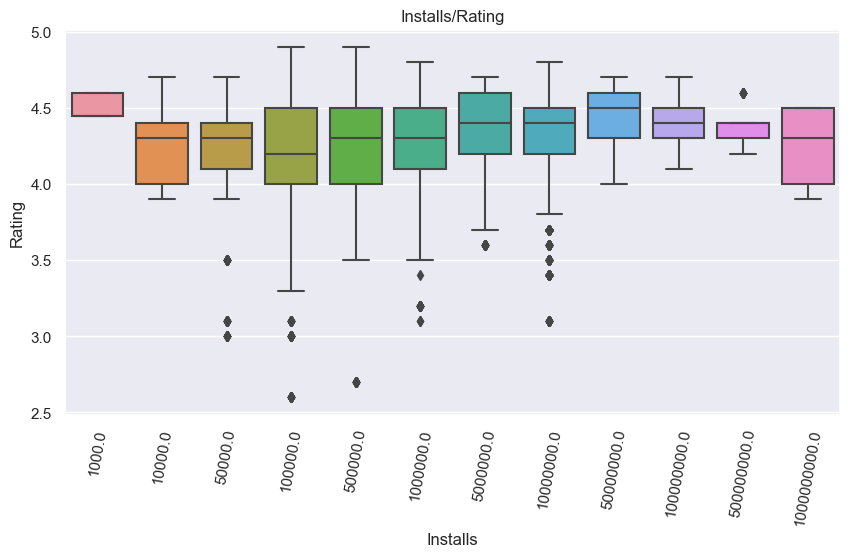

In [116]:
ax = plt.figure(figsize=(10,5))
sns.set()
sns.boxplot(x="Installs", y="Rating", data=df_m)
plt.title("Installs/Rating")
plt.xticks(rotation=80)
plt.show()

Increase in install rate the ratings gets higher too which means many download applicatons have higher ratings

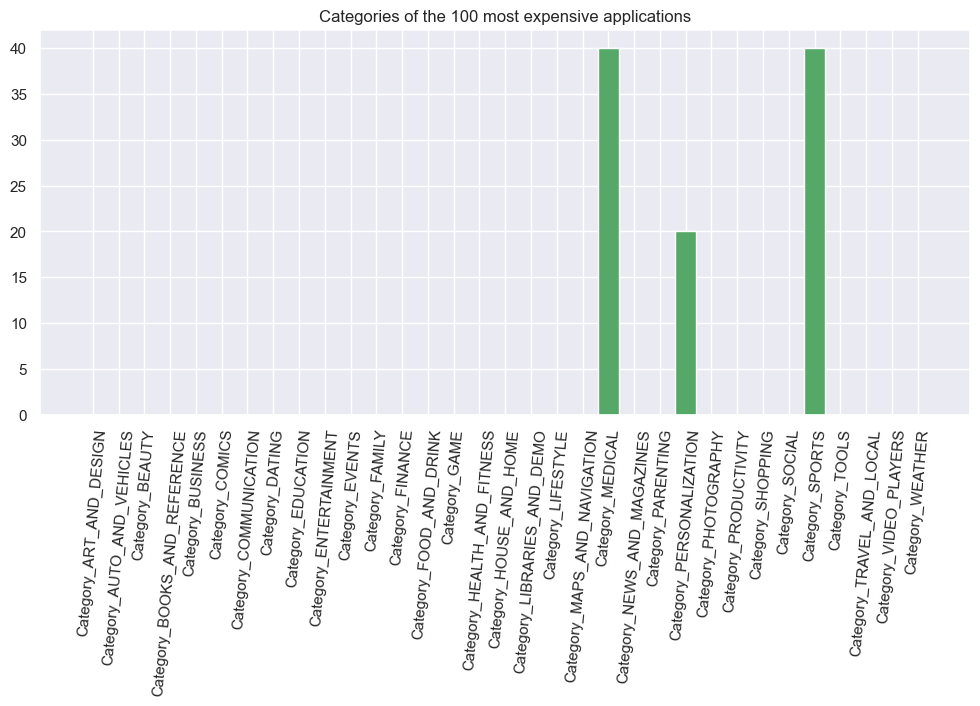

In [117]:
chart_data = df_m[df_m["Price"]>0]
chart_data = chart_data.sort_values(by=['Price'],ascending=False)
chart_data = chart_data.head(100)
dic = {}
cols = chart_data.loc[:,"Category_ART_AND_DESIGN":"Category_WEATHER"].columns.values
for i in cols:
    dic[i]=0
for i in range(100):
    x = chart_data.iloc[[i]]
    x = x.loc[:,"Category_ART_AND_DESIGN":"Category_WEATHER"]
    for j in x.columns.values:
        if (x[j].iloc[0] == 1):
            dic[j]= dic[j] + 1
plt.figure(figsize=(12,5))
plt.bar(dic.keys(), dic.values(), color='g')
plt.xticks(rotation=85)
plt.title("Categories of the 100 most expensive applications")
plt.show()

Medical sports and personalization category are important to people

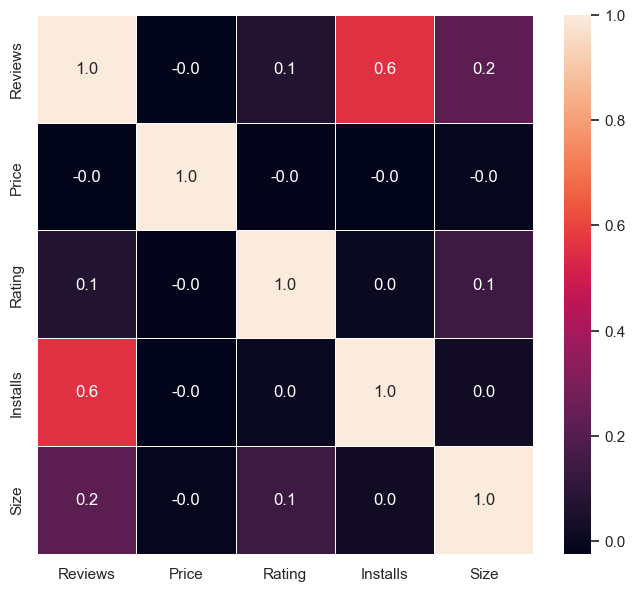

In [118]:
fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(df_m[["Reviews","Price","Rating","Installs","Size"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

In [119]:
pip install wordcloud

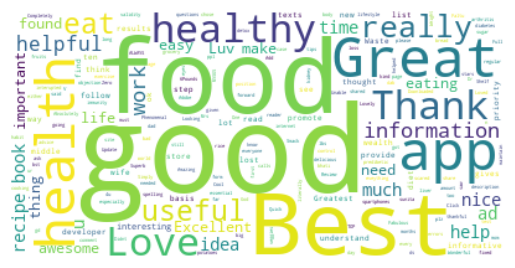

In [120]:

from wordcloud import WordCloud

df_app = df_2[df_2["App"] == "10 Best Foods for You"]

text = " ".join(review for review in df_app["Translated_Review"])

wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

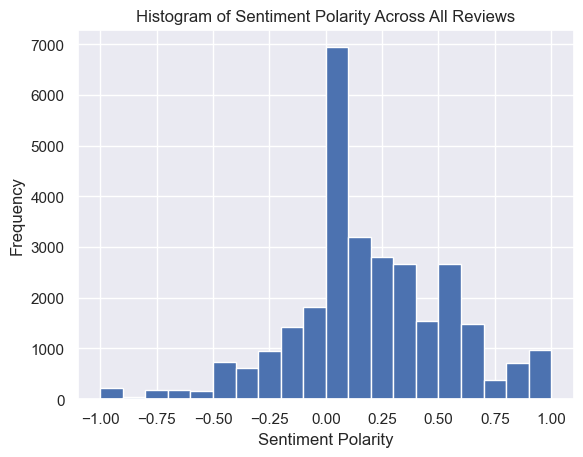

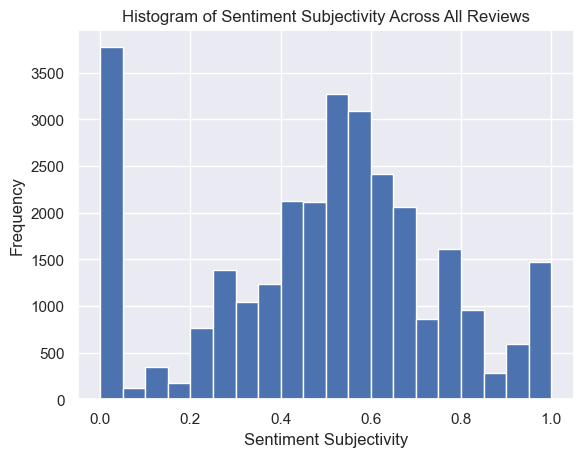

In [121]:
# Plot histogram of sentiment polarity
plt.hist(df_2["Sentiment_Polarity"], bins=20)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Histogram of Sentiment Polarity Across All Reviews")
plt.show()

# Plot histogram of sentiment subjectivity
plt.hist(df_2["Sentiment_Subjectivity"], bins=20)
plt.xlabel("Sentiment Subjectivity")
plt.ylabel("Frequency")
plt.title("Histogram of Sentiment Subjectivity Across All Reviews")
plt.show()

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting data to train and test sets

In [125]:
from sklearn.model_selection import train_test_split

# Features and Labels Segregation
X = df_m.drop(['App', 'Rating', 'Current Ver', 'Android Ver'], axis=1)
y = df_m['Rating']

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((30646, 44), (7662, 44), (30646,), (7662,))

# Linear Regression model

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_reg = LinearRegression() # Training the Linear Regression model
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

(mae, mse, rmse)

ValueError: could not convert string to float: 'Casual'